In [6]:
import psycopg2
import pandas as pd

In [11]:
# Establish a connection to the database by creating a cursor object
conn = psycopg2.connect(host="localhost", port = 5432, database="postgres", user="myusername", password="mypassword")

In [12]:
# Create a cursor object
cur = conn.cursor()

In [15]:
# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

In [16]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
golf_data = create_pandas_table("SELECT * FROM golfdata")

/Users/matilda/.local/share/virtualenvs/golf-a7Eg5Gvi/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [17]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()

In [18]:
golf_data

,id,height,ball_speed,launch_angle,landing_angle,hang_time,curve,flat_carry,side_angle
0,0,4.154,30.535,14.385,19.239,2.247538,1.107,55.436,16.255
1,1,26.784,75.244,13.376,29.896,5.923634,-1.787,252.926,-10.907
2,2,9.919,37.137,17.037,28.795,3.487934,1.574,89.328,5.061
3,3,6.190,29.751,17.365,26.687,2.799462,3.594,59.930,-7.140
4,4,19.213,32.710,34.837,45.414,4.320254,9.020,85.004,-8.246
...,...,...,...,...,...,...,...,...,...
9995,9995,17.001,39.466,23.044,40.312,4.336652,-0.756,93.255,7.415
9996,9996,9.642,34.010,17.115,33.684,3.625266,-6.692,76.638,-19.576
9997,9997,12.769,33.651,22.115,41.464,4.007329,11.634,78.381,-15.360
9998,9998,8.514,25.238,26.771,40.530,3.094743,-4.503,47.787,-10.846


In [21]:
#drop the index column
df=golf_data.drop(['id'], axis = 1)

<AxesSubplot:>

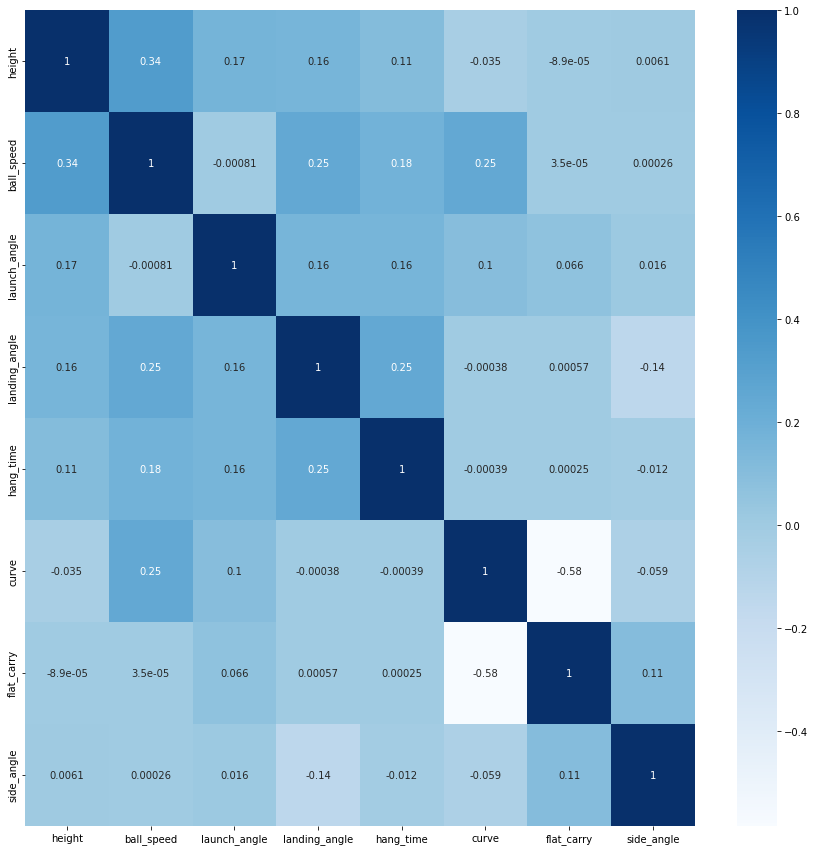

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))     
sns.heatmap(df.corr(),annot = True, cmap='Blues',ax = ax)

### From the correlation matrix, we can see that flat carry has high correlation with curve (-0.58), ball speed and height has correlation of 0.34, landing angle and ball speed has a correlation of 0.25.